In [21]:
import keras
keras.__version__

import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd

In [22]:


from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [23]:
len(train_data), len(test_data)

(8982, 2246)

In [24]:
# As with the IMDB reviews, each example is a list of integers (word indices):
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [25]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [26]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

In [27]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [28]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 0s 8ms/step - loss: 1.5943 - accuracy: 0.6620 - val_loss: 1.0860 - val_accuracy: 0.7660
Epoch 2/20
63/63 [==============================] - 0s 5ms/step - loss: 0.7801 - accuracy: 0.8286 - val_loss: 0.9211 - val_accuracy: 0.7880
Epoch 3/20
63/63 [==============================] - 0s 5ms/step - loss: 0.4548 - accuracy: 0.8991 - val_loss: 0.8763 - val_accuracy: 0.8160
Epoch 4/20
63/63 [==============================] - 0s 5ms/step - loss: 0.2982 - accuracy: 0.9341 - val_loss: 0.8424 - val_accuracy: 0.8230
Epoch 5/20
63/63 [==============================] - 0s 5ms/step - loss: 0.2239 - accuracy: 0.9436 - val_loss: 0.9112 - val_accuracy: 0.8050
Epoch 6/20
63/63 [==============================] - 0s 5ms/step - loss: 0.1862 - accuracy: 0.9500 - val_loss: 0.9511 - val_accuracy: 0.8110
Epoch 7/20
63/63 [==============================] - 0s 5ms/step - loss: 0.1655 - accuracy: 0.9531 - val_loss: 0.9300 - val_accuracy: 0.8140
Epoch 8/20
63/63 [==

Let's display its loss and accuracy curves:

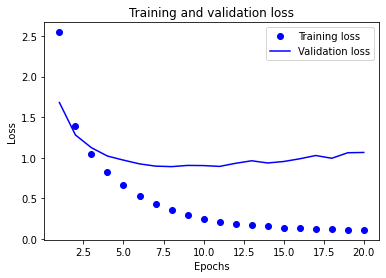

In [33]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


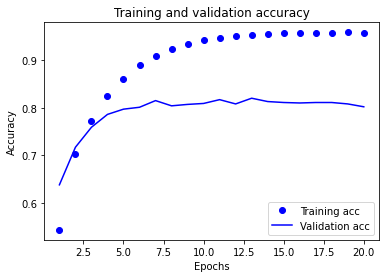

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [35]:
results = model.evaluate(x_test, one_hot_test_labels)
results

71/71 [==============================] - 0s 2ms/step - loss: 2.1143 - accuracy: 0.7752


[2.1142685413360596, 0.7751558423042297]

Not much difference. Limiting the numebr of epochs to 4 might give a better performance.

In [36]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=4,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/4
63/63 [==============================] - 0s 8ms/step - loss: 1.5624 - accuracy: 0.6630 - val_loss: 1.1088 - val_accuracy: 0.7560
Epoch 2/4
63/63 [==============================] - 0s 5ms/step - loss: 0.7461 - accuracy: 0.8378 - val_loss: 0.8921 - val_accuracy: 0.8140
Epoch 3/4
63/63 [==============================] - 0s 5ms/step - loss: 0.4369 - accuracy: 0.9072 - val_loss: 0.8974 - val_accuracy: 0.8080
Epoch 4/4
63/63 [==============================] - 0s 5ms/step - loss: 0.2930 - accuracy: 0.9337 - val_loss: 0.9053 - val_accuracy: 0.8150


In [37]:
#Can see the improvement in the result, the final accuracy (while evaluating) went up from 77% to 78%

results1 = model.evaluate(x_test, one_hot_test_labels)
results1

71/71 [==============================] - 0s 2ms/step - loss: 1.0207 - accuracy: 0.7809


[1.0207347869873047, 0.7809438705444336]